In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r"clean_listings.csv")
df.head()

,Unnamed: 0,location,property_type,bedrooms,bathrooms,size_sqm,amenities,price_kes,listing_date,size_sqft,...,balcony,cctv,elevator,garden,gym,parking,security,servant quarter,swimming pool,month
0,0,Ruaka,Penthouse,5,4,234.0,"cctv,servant quarter",20876564.0,2025-02-15,2518.75260,...,0,1,0,0,0,0,0,1,0,February
1,1,South B,Penthouse,2,2,122.6,"servant quarter,gym,swimming pool,elevator",11431043.0,2025-09-16,1319.65414,...,0,0,1,0,1,0,0,1,1,September
2,2,Kasarani,Penthouse,3,4,52.7,"cctv,swimming pool,balcony",9893180.0,2026-01-13,567.25753,...,1,1,0,0,0,0,0,0,1,January
3,3,Ruaka,Bungalow,3,3,99.6,"gym,servant quarter,elevator,security,garden",15415773.0,2025-10-07,1072.08444,...,0,0,1,1,1,0,1,1,0,October
4,4,Kileleshwa,Bungalow,3,2,50.1,"garden,servant quarter,elevator",13150006.0,2026-02-04,539.27139,...,0,0,1,1,0,0,0,1,0,February


In [3]:
# most expensive loations
df.groupby("location")["price_kes"].mean().sort_values(ascending=False).head()

location
Runda         3.982771e+07
Karen         3.457573e+07
Lavington     2.177254e+07
Westlands     2.018511e+07
Kileleshwa    1.848147e+07
Name: price_kes, dtype: float64

In [4]:
# correlation between price and size
df[["price_kes","size_sqft"]].corr()

,price_kes,size_sqft
price_kes,1.000000,0.377953
size_sqft,0.377953,1.000000


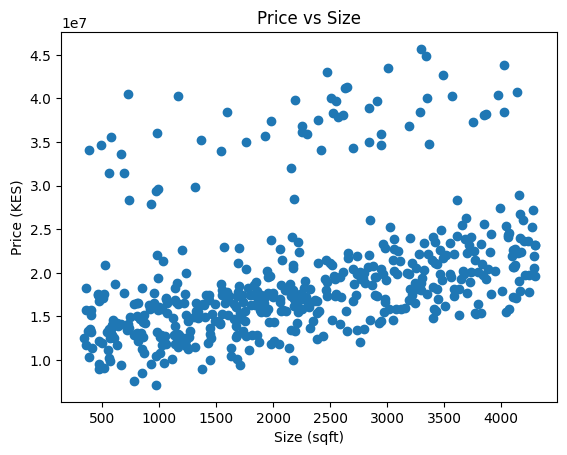

In [5]:
plt.figure()
plt.scatter(df["size_sqft"], df["price_kes"])
plt.xlabel("Size (sqft)")
plt.ylabel("Price (KES)")
plt.title("Price vs Size")
plt.show()

In [6]:
amenity_cols = [
    "balcony", "cctv", "elevator", "garden",
    "gym", "parking", "security",
    "servant quarter", "swimming pool"
]

amenity_impact = {}

for col in amenity_cols:
    mean_price = df.groupby(col)["price_kes"].mean()
    if 1 in mean_price.index:
        amenity_impact[col] = mean_price[1]

sorted(amenity_impact.items(), key=lambda x: x[1], reverse=True)

[('parking', np.float64(19930541.145454545)),
 ('balcony', np.float64(19864108.455621302)),
 ('gym', np.float64(19667268.965714287)),
 ('servant quarter', np.float64(19606415.848958332)),
 ('cctv', np.float64(19551730.45614035)),
 ('swimming pool', np.float64(19480094.02366864)),
 ('elevator', np.float64(19011552.23391813)),
 ('garden', np.float64(18952293.98275862)),
 ('security', np.float64(18403154.21637427))]

In [7]:
X = df[[
    "size_sqft",
    "bedrooms",
    "bathrooms",
    "balcony",
    "cctv",
    "elevator",
    "garden",
    "gym",
    "parking",
    "security",
    "servant quarter",
    "swimming pool"
]]

y = df["price_kes"]

In [8]:
# split into features and target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# train the model
model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred=model.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 4066916.1396219344
RMSE: 6203656.491063047
R2: 0.2249746495877959


In [12]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)
print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2:", rf_r2)


Random Forest MAE: 4639232.1873
Random Forest RMSE: 6608925.4834372355
Random Forest R2: 0.12040625085698009


In [13]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
import joblib

In [16]:
joblib.dump(model, "house_prices.joblib")

['house_prices.joblib']

In [18]:
joblib.dump(list(X.columns), "feature_names.joblib")

['feature_names.joblib']